In [1]:
pwd


ans =

    '9.3.0.713579 (R2017b)'


ans =

    '/Users/aidasaglinskas/Desktop/TN-PS-fMRI-NamesFaces/Code'



In [2]:
%plot inline

In [3]:
load('aBeta2.mat')
%load('aBeta_May2021.mat')
aBeta


aBeta = 

  struct with fields:

    fmat_raw: [21x12x20 double]
        fmat: [21x10x20 double]
      r_lbls: {21x1 cell}
        trim: [1x1 struct]
      list_R: {21x1 cell}
      list_T: {12x1 cell}
    wmat_raw: [21x12x24 double]
        wmat: [21x10x24 double]
    t_lbls10: {10x1 cell}
    t_lbls12: {12x1 cell}



In [4]:
size(aBeta.wmat)


ans =

    21    10    24



In [5]:
aBeta.rlbls = aBeta.r_lbls;
aBeta.tlbls10 = aBeta.t_lbls10;

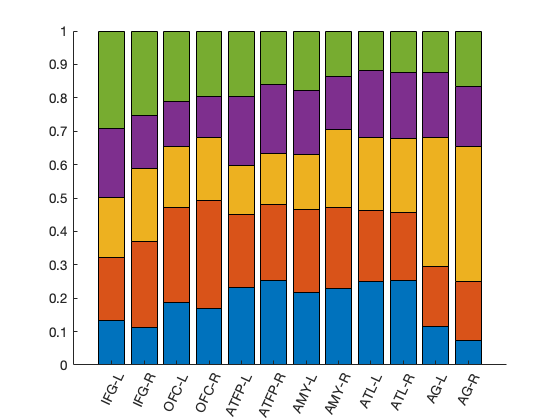

In [6]:
task_groups = {{  {'Friendliness'   }
    {'Trustworthiness'}}
{    {'Attractiveness' }
    {'Distinctiveness'}}
{    {'First memory'   }
    {'Familiarity'    }}
{    {'How many facts' }
    {'Occupation'     }}
{    {'First name'     }
    {'Last name'      }}};
task_group_labels = {'Social' 'Physical' 'Episodic' 'Biographical' 'Nominal'};

r_groups = {{   'OFA-L'
    'OFA-R'}
{    'FFA-L'
    'FFA-R'}
{    'pSTS-L'
    'pSTS-R'}
{    'IFG-L'
    'IFG-R'}
{    'OFC-L'
    'OFC-R'}
{    'ATFP-L'
    'ATFP-R'}
{    'AMY-L'
    'AMY-R'}
{    'ATL-L'
    'ATL-R'}
{    'AG-L'
    'AG-R'}
{    'PREC'}
{    'dmPFC'}
{    'vmPFC'}};
r_group_lbls = {'OFA' 'FFA' 'pSTS' 'IFG' 'OFC' 'ATFP' 'AMY' 'ATL' 'AG' 'PREC' 'dmPFC' 'vmPFC'};


r_groups = {
{    'IFG-L'
    'IFG-R'}
{    'OFC-L'
    'OFC-R'}
{    'ATFP-L'
    'ATFP-R'}
{    'AMY-L'
    'AMY-R'}
{    'ATL-L'
    'ATL-R'}
{    'AG-L'
    'AG-R'}
{    'PREC'}
{    'dmPFC'}
{    'vmPFC'}};
r_group_lbls = {'IFG' 'OFC' 'ATFP' 'AMY' 'ATL' 'AG' 'PREC' 'dmPFC' 'vmPFC'};


%rmat = aBeta.wmat(ismember(aBeta.r_lbls,{'AG-L' 'AG-R'}),:,:);
r_groups = aBeta.rlbls(7:18);
mat= [];
for j = 1:length(r_groups)
for i = 1:5
%mat(:,i,:) = mean(rmat(:,ismember(aBeta.t_lbls10,[task_groups{i}{:}]),:),2);
mat(j,i,:) = mean(mean(aBeta.fmat(ismember(aBeta.rlbls,r_groups{j}),ismember(aBeta.t_lbls10,[task_groups{i}{:}]),:),2),1);
end
end

plot_mat = mean(mat,3);
plot_mat = plot_mat-min(plot_mat,[],2)+1;
plot_mat = plot_mat ./ sum(plot_mat,2);
bar(plot_mat,'stacked');
%legend(task_group_labels);
xticklabels(r_groups);
xtickangle(65);
box off;
ylim([0 1])

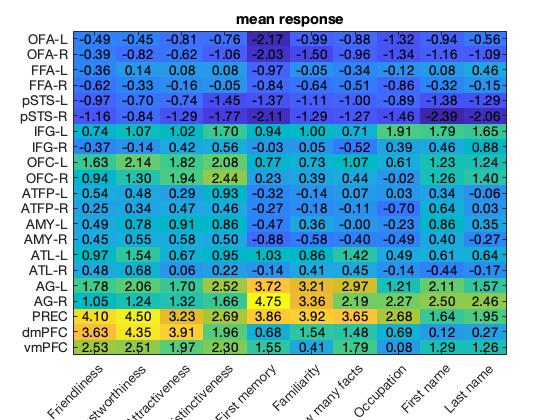

In [7]:
f = figure(1);
add_numbers_to_mat(mean(aBeta.wmat,3));
ax = get(f);
xticks(1:10);yticks(1:21)
ax.CurrentAxes.XTickLabel = aBeta.t_lbls10;
ax.CurrentAxes.XTickLabelRotation = 45;
ax.CurrentAxes.YTickLabel = aBeta.r_lbls;;
%ax.CurrentAxes.Position
ax.CurrentAxes.Position = ax.CurrentAxes.Position;
title('mean response')

In [8]:
size(aBeta.wmat_raw)


ans =

    21    12    24



In [9]:
size(aBeta.wmat)


ans =

    21    10    24



In [10]:
r = 1:21;
ps = squeeze(mean(aBeta.wmat_raw(r,1:10,:),2));
cc = squeeze(mean(aBeta.wmat_raw(r,11,:),2));

In [11]:
[H,P,CI,STATS] = ttest(ps',cc');
[H,P,CI,STATS] = ttest(ps'-cc');
[H,P,CI,STATS] = ttest(squeeze(mean(aBeta.wmat,2))');

Access to person knowledge (mean(all tasks) > name matching cc): t-statements

In [12]:
for i = 1:length(r)
if P(i) < .001
statement = sprintf('%s | t(23) = %.2f, p < .001',aBeta.rlbls{r(i)},STATS.tstat(i));
else
statement = sprintf('%s | t(23) = %.2f, p = %.3f',aBeta.rlbls{r(i)},STATS.tstat(i),P(i));
end

disp(statement)

end

OFA-L | t(23) = -3.30, p = 0.003
OFA-R | t(23) = -3.04, p = 0.006
FFA-L | t(23) = -0.51, p = 0.618
FFA-R | t(23) = -2.31, p = 0.030
pSTS-L | t(23) = -3.49, p = 0.002
pSTS-R | t(23) = -4.88, p < .001
IFG-L | t(23) = 5.21, p < .001
IFG-R | t(23) = 0.94, p = 0.356
OFC-L | t(23) = 4.36, p < .001
OFC-R | t(23) = 4.53, p < .001
ATFP-L | t(23) = 1.32, p = 0.201
ATFP-R | t(23) = 1.05, p = 0.305
AMY-L | t(23) = 1.92, p = 0.067
AMY-R | t(23) = -0.07, p = 0.941
ATL-L | t(23) = 4.79, p < .001
ATL-R | t(23) = 0.86, p = 0.396
AG-L | t(23) = 3.74, p = 0.001
AG-R | t(23) = 4.90, p < .001
PREC | t(23) = 10.30, p < .001
dmPFC | t(23) = 4.41, p < .001
vmPFC | t(23) = 3.59, p = 0.002


In [13]:
r = aBeta.rlbls(7:18);
r(1:2:end);

In [14]:
for t = 1:5
%tasks = aBeta.t_lbls10{t};
vec = squeeze(aBeta.wmat(ismember(aBeta.rlbls,'PREC'),ismember(aBeta.t_lbls10,aBeta.t_lbls10(aBeta.trim.t_inds{t})),:));
vec = mean(vec);
statement = pretty_t_test_one_sample(vec);
disp(sprintf('%s | %s',aBeta.trim.t_lbls{t},statement))
end

Episodic | t(23) = 9.27, p < .001
Factual | t(23) = 8.59, p < .001
Social | t(23) = 6.88, p < .001
Physical | t(23) = 6.92, p < .001
Nominal | t(23) = 7.50, p < .001


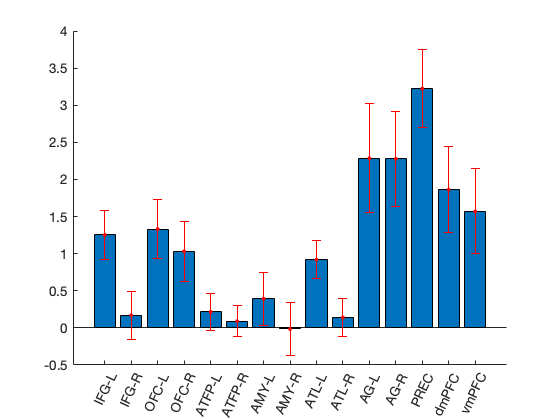

In [15]:
rois = {'ATFP-L' 'ATFP-R' 'ATL-L' 'ATL-R' 'AMY-L' 'AMY-R' 'AG-L' 'AG-R' 'IFG-L' 'IFG-R' 'OFC-L' 'OFC-R' 'PREC' 'dmPFC' 'vmPFC'};
r_idx = ismember(aBeta.rlbls,rois);
clf
m = mean(mean(aBeta.wmat(7:21,:,:),3),2);
se = mean(std(aBeta.wmat(7:21,:,:),[],3),2) ./ sqrt(24);

bar(m);hold on;
errorbar(m,se,'r.')
xticklabels(aBeta.rlbls(7:21))
xtickangle(65)
box off

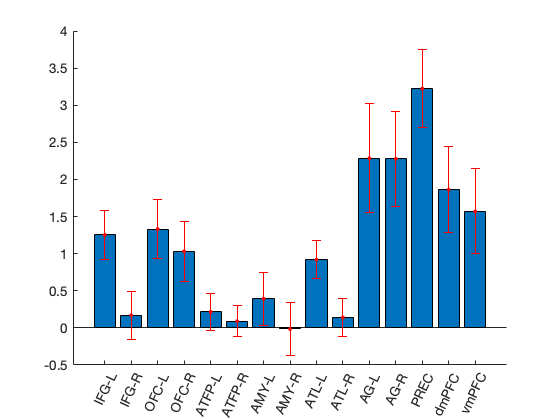

In [16]:
rois = {'ATFP-L' 'ATFP-R' 'ATL-L' 'ATL-R' 'AMY-L' 'AMY-R' 'AG-L' 'AG-R' 'IFG-L' 'IFG-R' 'OFC-L' 'OFC-R' 'PREC' 'dmPFC' 'vmPFC'};
r_idx = ismember(aBeta.rlbls,rois);
clf
m = mean(mean(aBeta.wmat(7:21,:,:),3),2);
se = mean(std(aBeta.wmat(7:21,:,:),[],3),2) ./ sqrt(24);

bar(m);hold on;
errorbar(m,se,'r.')
xticklabels(aBeta.rlbls(7:21))
xtickangle(65)
box off

In [17]:
% add_numbers_to_mat(model_pairs)
% xticklabels(lbls)
% yticklabels(lbls)
% xtickangle(90)

In [18]:
%%file fit_rsa.m
function model_fit = fit_rsa(data,model)

n = size(model,1);
e = 1:n;
model(logical(eye(size(model)))) = 0;
e = sum(model)~=0;
model = model(e,e);

idx = find(triu(ones(size(model)),1));
nsubs = size(data,3);
model_fit = nan(1,nsubs);


for s = 1:nsubs
subdata = data(e,e,s);
model_fit(s) = corr(subdata(idx),model(idx));
%model_fit(s) = corr(get_triu(subdata)',get_triu(model)');
end


end

Created file '/Users/aidasaglinskas/Desktop/TN-PS-fMRI-NamesFaces/Code/fit_rsa.m'.


In [19]:
%hist(squeeze(aBeta.wmat(5,6,:)))

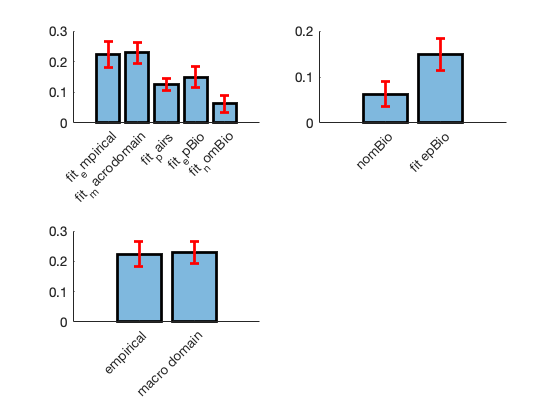

In [20]:
%plot inline
%disp(aBeta.rlbls);
rois = {'ATFP-L' 'ATFP-R' 'ATL-L' 'ATL-R' 'AMY-L' 'AMY-R' 'AG-L' 'AG-R' 'IFG-L' 'IFG-R' 'OFC-L' 'OFC-R' 'PREC' 'dmPFC' 'vmPFC'};
r_idx = ismember(aBeta.rlbls,rois);

nsubs = size(aBeta.fmat,3);
cmat_face = [];
for s = 1:nsubs;
    cmat_face(:,:,s) = corr(aBeta.fmat(r_idx ,:,s));;
end

nsubs = size(aBeta.wmat,3);
cmat_words = [];
for s = 1:nsubs
    cmat_words(:,:,s) = corr(aBeta.wmat(r_idx ,:,s));
end
%


lbls = aBeta.tlbls10;
model_empirical = mean(cmat_face,3);
model_pairs = make_model(lbls,{ {'Attractiveness'    'Distinctiveness'}    {'Trustworthiness' 'Friendliness' } {'First memory' 'Familiarity'} {'Occupation'  'How many facts'} {'First name' 'Last name'} });
model_epBio = make_model(lbls,{ {'Attractiveness'    'Distinctiveness'}    {'Trustworthiness' 'Friendliness' } {'First memory' 'Familiarity' 'Occupation'  'How many facts'} {'First name' 'Last name'} });
model_nomBio = make_model(lbls,{ {'Attractiveness'    'Distinctiveness'}    {'Trustworthiness' 'Friendliness' } {'First memory' 'Familiarity'} {'Occupation'  'How many facts' 'First name' 'Last name'} });
model_macrodomain = make_model(lbls,{ {'Attractiveness'    'Distinctiveness'    'Trustworthiness' 'Friendliness' } {'First memory' 'Familiarity' 'Occupation'  'How many facts'} {'First name' 'Last name'} });

%fit_empirical = fit_rsa(cmat_words,model_empirical);
fit_empirical = fit_rsa(cmat_words,model_empirical);
fit_macrodomain = fit_rsa(cmat_words,model_macrodomain);

fit_pairs = fit_rsa(cmat_words,model_pairs);
fit_epBio = fit_rsa(cmat_words,model_epBio);
fit_nomBio = fit_rsa(cmat_words,model_nomBio);
% %

subplot(2,2,1);plot_rsa_fit({fit_empirical fit_macrodomain fit_pairs fit_epBio fit_nomBio},{'fit_empirical' 'fit_macrodomain' 'fit_pairs' 'fit_epBio' 'fit_nomBio'});
subplot(2,2,2);plot_rsa_fit({fit_nomBio,fit_epBio},{'nomBio' 'fit epBio'});
subplot(2,2,3);plot_rsa_fit({fit_empirical,fit_macrodomain},{'empirical' 'macro domain'});

pretty_t_test_paired(fit_empirical,fit_macrodomain);
pretty_t_test_paired(fit_epBio,fit_nomBio);
%pretty_t_test_paired(fit_macrodomain,fit_epBio);


ans =

    't(23) = 5.22, p < .001'


ans =

    't(23) = 4.36, p < .001'


ans =

    't(23) = 4.15, p < .001'



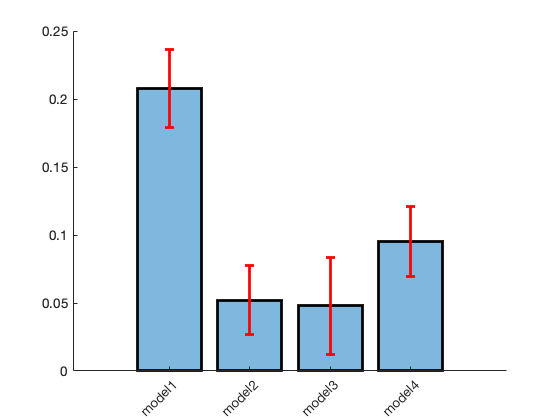

In [21]:
%% Attractiveness models
model1 = make_model(lbls,{ {'Attractiveness'    'Distinctiveness' 'Trustworthiness' 'Friendliness' } {'First memory' 'Familiarity'} {'Occupation'  'How many facts'} {'First name' 'Last name'} });
model2 = make_model(lbls,{ {'Trustworthiness' 'Friendliness' } {'Attractiveness'    'Distinctiveness' 'First memory' 'Familiarity'} {'Occupation'  'How many facts'} {'First name' 'Last name'} });
model3 = make_model(lbls,{ {'Trustworthiness' 'Friendliness' } {'First memory' 'Familiarity'} {'Attractiveness'    'Distinctiveness' 'Occupation'  'How many facts'} {'First name' 'Last name'} });
model4 = make_model(lbls,{ {'Trustworthiness' 'Friendliness' } {'First memory' 'Familiarity'} {'Occupation'  'How many facts'} {'Attractiveness'    'Distinctiveness' 'First name' 'Last name'} });

model1_fit = fit_rsa(cmat_words,model1);
model2_fit = fit_rsa(cmat_words,model2);
model3_fit = fit_rsa(cmat_words,model3);
model4_fit = fit_rsa(cmat_words,model4);

plot_rsa_fit({model1_fit,model2_fit,model3_fit,model4_fit},{'model1','model2','model3','model4'});

pretty_t_test_paired(model1_fit,model2_fit)
pretty_t_test_paired(model1_fit,model3_fit)
pretty_t_test_paired(model1_fit,model4_fit)


ans =

    't(23) = 4.31, p < .001'


ans =

    't(23) = 3.75, p = 0.001'


ans =

    't(23) = 6.19, p < .001'



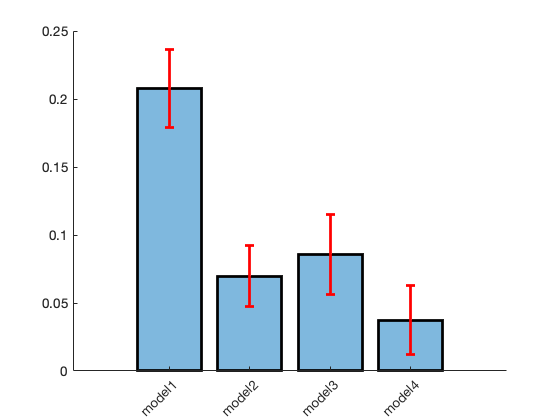

In [22]:
%% Social models

model1 = make_model(lbls,{ {'Attractiveness'    'Distinctiveness' 'Trustworthiness' 'Friendliness' } {'First memory' 'Familiarity'} {'Occupation'  'How many facts'} {'First name' 'Last name'} });
model2 = make_model(lbls,{ {'Attractiveness'    'Distinctiveness'} {'Trustworthiness' 'Friendliness' 'First memory' 'Familiarity'} {'Occupation'  'How many facts'} {'First name' 'Last name'} });
model3 = make_model(lbls,{ {'Attractiveness'    'Distinctiveness'} {'First memory' 'Familiarity'} {'Trustworthiness' 'Friendliness'  'Occupation'  'How many facts'} {'First name' 'Last name'} });
model4 = make_model(lbls,{ {'Attractiveness'    'Distinctiveness'} {'First memory' 'Familiarity'} {'Occupation'  'How many facts'} {'Trustworthiness' 'Friendliness'  'First name' 'Last name'} });

model1_fit = fit_rsa(cmat_words,model1);
model2_fit = fit_rsa(cmat_words,model2);
model3_fit = fit_rsa(cmat_words,model3);
model4_fit = fit_rsa(cmat_words,model4);

plot_rsa_fit({model1_fit,model2_fit,model3_fit,model4_fit},{'model1','model2','model3','model4'});

pretty_t_test_paired(model1_fit,model2_fit)
pretty_t_test_paired(model1_fit,model3_fit)
pretty_t_test_paired(model1_fit,model4_fit)

In [23]:
%%file rsa_r2.m
function r = rsa_r2(data,model)

r = corr(get_triu(mean(data,3))',get_triu(mean(model,3))');
disp(sprintf('r = %.2f / r2 = %.2f',r,r^2))

end

Created file '/Users/aidasaglinskas/Desktop/TN-PS-fMRI-NamesFaces/Code/rsa_r2.m'.


ROIS

In [24]:
size(cmat_words)


ans =

    10    10    24



In [25]:
rsa_r2(cmat_words,model_empirical);

r = 0.61 / r2 = 0.37


In [26]:
rsa_r2(cmat_words,model_macrodomain);

r = 0.64 / r2 = 0.40


In [27]:
rsa_r2(cmat_words,model_epBio);

r = 0.40 / r2 = 0.16


In [28]:
rsa_r2(cmat_words,model_nomBio);

r = 0.19 / r2 = 0.04


In [29]:
%model_empirical model_pairs model_epBio model_nomBio model_macrodomain

In [30]:
[h,p,ci,stats] = ttest(fit_macrodomain);

In [31]:
[h,p,ci,stats] = ttest(fit_pairs);

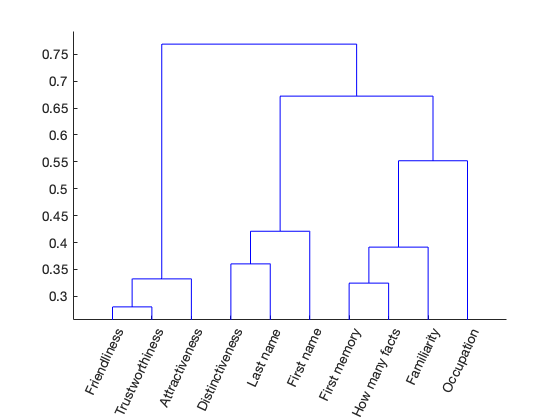

In [32]:
dendrogram(linkage(1-get_triu(mean(cmat_words,3)),'ward'),'labels',aBeta.t_lbls10)
xtickangle(65)

In [33]:
aBeta.rlbls = aBeta.r_lbls;
aBeta.tlbls10 = aBeta.t_lbls10;

In [34]:
% rlbls = aBeta.r_lbls(7:21);
% posthoc_model2  = make_model(rlbls,{{'ATFP-L' 'ATFP-R' 'AMY-L' 'AMY-R' 'OFC-L' 'OFC-R' } {'IFG-L' 'IFG-R' 'ATL-L' 'ATL-R' 'AG-L' 'AG-R' 'PREC' 'dmPFC' 'vmPFC'}});
% posthoc2_fit = fit_rsa(cmat_words,posthoc_model2);


% posthoc_model3  = make_model(rlbls,{{'ATFP-L' 'ATFP-R' 'AMY-L' 'AMY-R' 'OFC-L' 'OFC-R' } {'IFG-L' 'IFG-R'  'AG-L' 'AG-R'} {'ATL-L' 'ATL-R' 'PREC' 'dmPFC' 'vmPFC'}});
% posthoc3_fit = fit_rsa(cmat_words,posthoc_model3);

In [35]:
% size(cmat_words_all)

In [36]:
disp(aBeta.rlbls);
rois = {'ATFP-L' 'ATFP-R' 'ATL-L' 'ATL-R' 'AMY-L' 'AMY-R' 'AG-L' 'AG-R' 'IFG-L' 'IFG-R' 'OFC-L' 'OFC-R' 'PREC' 'dmPFC' 'vmPFC'};
r_idx = ismember(aBeta.rlbls,rois);

nsubs = size(aBeta.fmat,3);
cmat_face_all = [];
for s = 1:nsubs;
    cmat_face_all(:,:,s) = corr(aBeta.fmat(:,:,s)');
end

nsubs = size(aBeta.wmat,3);
cmat_words_all = [];
for s = 1:nsubs
    cmat_words_all(:,:,s) = corr(aBeta.wmat(: ,:,s)');
end

cmat_face = cmat_face_all(r_idx,r_idx,:);
cmat_words = cmat_words_all(r_idx,r_idx,:);


%
rlbls = aBeta.rlbls(r_idx);
%pairs_model = make_model(rlbls, {{'ATFP-L' 'ATFP-R'} {'ATL-L' 'ATL-R'} {'AMY-L' 'AMY-R'} {'AG-L' 'AG-R'} {'IFG-L' 'IFG-R'} {'OFC-L' 'OFC-R'}})
pairs_model = make_model(rlbls(1:12), {{'ATFP-L' 'ATFP-R'} {'ATL-L' 'ATL-R'} {'AMY-L' 'AMY-R'} {'AG-L' 'AG-R'} {'IFG-L' 'IFG-R'} {'OFC-L' 'OFC-R'}});
pairs_fit = fit_rsa(cmat_words(1:12,1:12,:),pairs_model);

iec_model  = make_model(rlbls,{{'ATFP-L' 'ATFP-R' 'AMY-L' 'AMY-R'} {'IFG-L' 'IFG-R' 'OFC-L' 'OFC-R'} {'ATL-L' 'ATL-R' 'AG-L' 'AG-R' 'PREC' 'dmPFC' 'vmPFC'}});
empirical_model = cmat_face;

empirical_fit = fit_rsa(cmat_words,mean(cmat_face,3));

iec_fit = fit_rsa(cmat_words,iec_model);

plot_rsa_fit({pairs_fit iec_fit empirical_fit posthoc2_fit posthoc3_fit},{'pairs' 'iec' 'empirical' 'posthoc2_fit' 'posthoc3_fit'});

pretty_t_test_paired(iec_fit,pairs_fit);
pretty_t_test_paired(empirical_fit,iec_fit);

    'OFA-L'
    'OFA-R'
    'FFA-L'
    'FFA-R'
    'pSTS-L'
    'pSTS-R'
    'IFG-L'
    'IFG-R'
    'OFC-L'
    'OFC-R'
    'ATFP-L'
    'ATFP-R'
    'AMY-L'
    'AMY-R'
    'ATL-L'
    'ATL-R'
    'AG-L'
    'AG-R'
    'PREC'
    'dmPFC'
    'vmPFC'



Error using eval
Undefined function or variable 'posthoc2_fit'.



In [37]:
core = ismember(aBeta.rlbls,{ 'OFA-L' 'OFA-R' 'FFA-L' 'FFA-R' 'pSTS-L' 'pSTS-R'});
extended = ~core;

In [38]:
mean(cmat_words_all(extended,extended,:),3);

In [39]:
%%file pretty_t_test_paired.m
function pretty_t_test_paired(vec1,vec2)
% vec1 = fit_empirical
% vec2 = fit_macrodomain

% vec1 = fit_epBio
% vec2 = fit_nomBio
[H,P,CI,STATS] = ttest(vec1,vec2);

if P >= .001
disp(sprintf('t(%d) = %.2f, p = %.3f',STATS.df,STATS.tstat,P));
else
disp(sprintf('t(%d) = %.2f, p < .001',STATS.df,STATS.tstat));
end

end

Created file '/Users/aidasaglinskas/Desktop/TN-PS-fMRI-NamesFaces/Code/pretty_t_test_paired.m'.


In [40]:
%%file pretty_t_test_one_sample.m
function pretty_t_test_paired(vec1)

[H,P,CI,STATS] = ttest(vec1);

if P >= .001
disp(sprintf('t(%d) = %.2f, p = %.3f',STATS.df,STATS.tstat,P));
else
disp(sprintf('t(%d) = %.2f, p < .001',STATS.df,STATS.tstat));
end

end

Created file '/Users/aidasaglinskas/Desktop/TN-PS-fMRI-NamesFaces/Code/pretty_t_test_one_sample.m'.


In [41]:
face_name_fit_extended = fit_rsa(cmat_words_all(extended,extended,:),mean(cmat_face_all(extended,extended,:),3));
face_name_fit_core = fit_rsa(cmat_words_all(core,core,:),mean(cmat_face_all(core,core,:),3));

In [42]:
pretty_t_test_one_sample(face_name_fit_extended)

t(23) = 10.30, p < .001


In [43]:
pretty_t_test_one_sample(face_name_fit_core)

t(23) = 7.04, p < .001


In [44]:
r = corr(get_triu(mean(cmat_words,3))',get_triu(mean(cmat_face,3))');
disp(sprintf('%.2f / %.2f',r,r^2))

0.77 / 0.59


In [45]:
r = corr(get_triu(mean(cmat_words,3))',get_triu(mean(cmat_face,3))');
disp(sprintf('%.2f / %.2f',r,r^2))

0.77 / 0.59


In [46]:
[h,p,ci,stats] = ttest(iec_fit);

In [47]:
[h,p,ci,stats] = ttest(empirical_fit);

In [48]:
% pretty_t_test_paired(iec_fit,posthoc2_fit);
% pretty_t_test_paired(iec_fit,posthoc3_fit);

In [49]:
%pretty_t_test_paired(iec_fit,posthoc3_fit);

    'OFA-L'
    'OFA-R'
    'FFA-L'
    'FFA-R'
    'pSTS-L'
    'pSTS-R'
    'IFG-L'
    'IFG-R'
    'OFC-L'
    'OFC-R'
    'ATFP-L'
    'ATFP-R'
    'AMY-L'
    'AMY-R'
    'ATL-L'
    'ATL-R'
    'AG-L'
    'AG-R'
    'PREC'
    'dmPFC'
    'vmPFC'

t(23) = -0.22, p = 0.829
t(23) = 3.75, p = 0.001


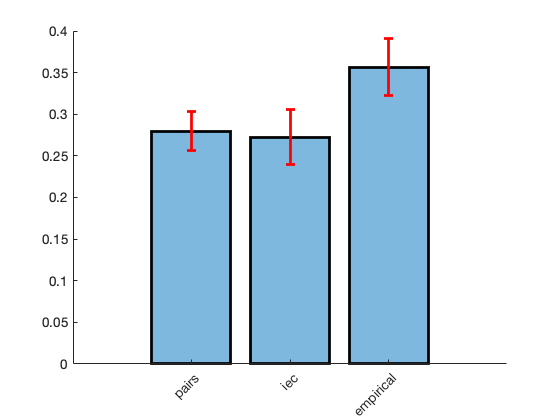

In [50]:
disp(aBeta.rlbls);
rois = {'ATFP-L' 'ATFP-R' 'ATL-L' 'ATL-R' 'AMY-L' 'AMY-R' 'AG-L' 'AG-R' 'IFG-L' 'IFG-R' 'OFC-L' 'OFC-R' 'PREC' 'dmPFC' 'vmPFC'};
r_idx = ismember(aBeta.rlbls,rois);

nsubs = size(aBeta.fmat,3);
cmat_face = [];
for s = 1:nsubs;
    cmat_face(:,:,s) = corr(aBeta.fmat(r_idx ,:,s)');
end

nsubs = size(aBeta.wmat,3);
cmat_words = [];
for s = 1:nsubs
    cmat_words(:,:,s) = corr(aBeta.wmat(r_idx ,:,s)');
end
%
rlbls = aBeta.rlbls(r_idx);
%pairs_model = make_model(rlbls, {{'ATFP-L' 'ATFP-R'} {'ATL-L' 'ATL-R'} {'AMY-L' 'AMY-R'} {'AG-L' 'AG-R'} {'IFG-L' 'IFG-R'} {'OFC-L' 'OFC-R'}})
pairs_model = make_model(rlbls(1:12), {{'ATFP-L' 'ATFP-R'} {'ATL-L' 'ATL-R'} {'AMY-L' 'AMY-R'} {'AG-L' 'AG-R'} {'IFG-L' 'IFG-R'} {'OFC-L' 'OFC-R'}});
pairs_fit = fit_rsa(cmat_words(1:12,1:12,:),pairs_model);

iec_model  = make_model(rlbls,{{'ATFP-L' 'ATFP-R' 'AMY-L' 'AMY-R'} {'IFG-L' 'IFG-R' 'OFC-L' 'OFC-R'} {'ATL-L' 'ATL-R' 'AG-L' 'AG-R' 'PREC' 'dmPFC' 'vmPFC'}});
empirical_model = cmat_face;

empirical_fit = fit_rsa(cmat_words,mean(cmat_face,3));

iec_fit = fit_rsa(cmat_words,iec_model);
plot_rsa_fit({pairs_fit iec_fit empirical_fit},{'pairs' 'iec' 'empirical'});

pretty_t_test_paired(iec_fit,pairs_fit);
pretty_t_test_paired(empirical_fit,iec_fit);

In [51]:
[H,P,CI,STATS] = ttest(iec_fit,empirical_fit)


H =

     1


P =

    0.0010


CI =

   -0.1306   -0.0377


STATS = 

  struct with fields:

    tstat: -3.7512
       df: 23
       sd: 0.1099



In [52]:
%plot native
%%%plot inline 
%Bar plot: IEC vs Empirical fit
f = figure(1);clf

m = [mean(iec_fit) mean(empirical_fit)];
se = [std(iec_fit) std(empirical_fit)] ./ sqrt(length(iec_fit));

h = bar(m);hold on;
he = errorbar(m,se,'r.');
hold off;

he.LineWidth = 2;
h.FaceColor = [0 0.4470 0.7410] * 1;
h.LineWidth = 2;

xticklabels({'I/E/C' 'Empirical'});

f.CurrentAxes.LineWidth = 2;
f.CurrentAxes.FontSize= 14;
f.CurrentAxes.FontWeight = 'bold';
box off

ylabel('Model fit (r)')

hold on
plot([.6 2.4],[max(se)+max(m) max(se)+max(m)]*1.1,'k-','linewidth',2)
%text(mean([.6 2.4]-.2),[max(se)+max(m)*1.15],'**','fontsize',35,'fontname','American Typewriter')
%text(mean([.6 2.4]-.2),[max(se)+max(m)*1.15],'p = .001','fontsize',18,'fontname','American Typewriter')
hold off
f.Color = [1 1 1]

plot added to session magics.


f = 

  Figure (1) with properties:

      Number: 1
        Name: ''
       Color: [1 1 1]
    Position: [680 558 560 420]
       Units: 'pixels'

  Use GET to show all properties



# ROI DENDROGRAM

In [53]:
figdir = '/Users/aidasaglinskas/Desktop/TN-PS-fMRI-NamesFaces/Figures/';

In [88]:
%plot native
% ROI dendrogram
f = figure(1);
[H,T] = dendrogram(linkage(1-get_triu(mean(cmat_words,3)),'ward'),'labels',aBeta.rlbls(7:end));
xtickangle(65);

for i = 1:length(H);
    H(i).Color = [0 0 0];
    H(i).LineWidth = 3;
end

%get(f.CurrentAxes);

f.CurrentAxes.LineWidth = 3;
f.CurrentAxes.FontSize = 14;
f.CurrentAxes.FontWeight = 'bold';
f.CurrentAxes.XTickLabelRotation = 45;
ylabel('dissimilarity (a.u)');

%xticks(1:15)


%saveas(f,fullfile(figdir,'roi_dend.png'))

> In linkage (line 171)


In [55]:
slice = cmat_words(ismember(rlbls,{'AG-L' 'AG-R' }),ismember(rlbls,{'IFG-L' 'IFG-R'}),:);
mean_slice = squeeze(mean(mean(slice,1),2));
mean(mean_slice)


ans =

    0.3021



In [56]:
r = corr(get_triu(mean(cmat_words,3))',get_triu(mean(cmat_face,3))')


r =

    0.7711



In [57]:
rlbls = aBeta.rlbls(7:end);
add_numbers_to_mat(mean(cmat_words,3));
xticks(1:length(rlbls));
yticks(1:length(rlbls));
xticklabels(rlbls);
yticklabels(rlbls);
xtickangle(65);

In [58]:
size(cmat_words(ismember(rlbls,'ATFP-L'),~ismember(rlbls,{'ATFP-R','ATFP-L'}),:))


ans =

     1    13    24



In [59]:
%%file pretty_t_test_paired.m

function statement= pretty_t_test_paired(vec1,vec2)
[H,P,CI,STATS] = ttest(vec1,vec2);

if P >= .001
statement = sprintf('t(%d) = %.2f, p = %.3f',STATS.df,STATS.tstat,P);
else
statement = sprintf('t(%d) = %.2f, p < .001',STATS.df,STATS.tstat);
end

end

Created file '/Users/aidasaglinskas/Desktop/TN-PS-fMRI-NamesFaces/Code/pretty_t_test_paired.m'.


In [60]:
disp(rlbls)

    'IFG-L'
    'IFG-R'
    'OFC-L'
    'OFC-R'
    'ATFP-L'
    'ATFP-R'
    'AMY-L'
    'AMY-R'
    'ATL-L'
    'ATL-R'
    'AG-L'
    'AG-R'
    'PREC'
    'dmPFC'
    'vmPFC'



In [61]:
size(cmat_words)


ans =

    15    15    24



In [62]:
rlbls


rlbls =

  15x1 cell array

    {'IFG-L' }
    {'IFG-R' }
    {'OFC-L' }
    {'OFC-R' }
    {'ATFP-L'}
    {'ATFP-R'}
    {'AMY-L' }
    {'AMY-R' }
    {'ATL-L' }
    {'ATL-R' }
    {'AG-L'  }
    {'AG-R'  }
    {'PREC'  }
    {'dmPFC' }
    {'vmPFC' }



In [63]:
size(cmat_words)


ans =

    15    15    24



In [64]:
for r = 1:15
roi = rlbls{r};
within = squeeze(cmat_words(ismember(rlbls,'ATFP-R'),ismember(rlbls,'ATFP-L'),:));
across = squeeze(cmat_words(ismember(rlbls,'ATFP-R'),ismember(rlbls,roi),:));
statement = pretty_t_test_paired(within,across);
disp(sprintf('%s | %s',roi,statement))

end

IFG-L | t(23) = 3.13, p = 0.005
IFG-R | t(23) = 3.83, p < .001
OFC-L | t(23) = 0.47, p = 0.640
OFC-R | t(23) = 0.71, p = 0.483
ATFP-L | t(23) = NaN, p < .001
ATFP-R | t(23) = -8.18, p < .001
AMY-L | t(23) = 2.91, p = 0.008
AMY-R | t(23) = 1.72, p = 0.098
ATL-L | t(23) = 4.19, p < .001
ATL-R | t(23) = 4.73, p < .001
AG-L | t(23) = 4.49, p < .001
AG-R | t(23) = 6.12, p < .001
PREC | t(23) = 6.13, p < .001
dmPFC | t(23) = 3.78, p < .001
vmPFC | t(23) = 2.42, p = 0.024


In [65]:
for r = 1:15
roi = rlbls{r};
within = squeeze(cmat_words(ismember(rlbls,'ATFP-L'),ismember(rlbls,'ATFP-R'),:));
across = squeeze(cmat_words(ismember(rlbls,'ATFP-L'),ismember(rlbls,roi),:));
statement = pretty_t_test_paired(within,across);
disp(sprintf('%s | %s',roi,statement))

end

IFG-L | t(23) = 2.13, p = 0.044
IFG-R | t(23) = 1.81, p = 0.083
OFC-L | t(23) = 0.44, p = 0.663
OFC-R | t(23) = 1.02, p = 0.319
ATFP-L | t(23) = -8.18, p < .001
ATFP-R | t(23) = NaN, p < .001
AMY-L | t(23) = 0.27, p = 0.791
AMY-R | t(23) = 1.38, p = 0.182
ATL-L | t(23) = 1.35, p = 0.189
ATL-R | t(23) = 0.53, p = 0.604
AG-L | t(23) = 2.75, p = 0.011
AG-R | t(23) = 3.97, p < .001
PREC | t(23) = 1.21, p = 0.237
dmPFC | t(23) = 0.62, p = 0.540
vmPFC | t(23) = 0.57, p = 0.574


In [66]:
help pretty_t_test_paired

 plot inline



In [67]:
within = squeeze(cmat_words(ismember(rlbls,'ATFP-L'),ismember(rlbls,'ATFP-R'),:));
across = squeeze(cmat_words(ismember(rlbls,'ATFP-L'),~ismember(rlbls,{'ATFP-R','ATFP-L'}),:));
across = squeeze(mean(across,1))';
pretty_t_test_paired(within,across)


ans =

    't(23) = 1.79, p = 0.087'



In [68]:
ttest(within,across)


ans =

     0



In [69]:
lbl1 = cellfun(@(x) ['face-' x],aBeta.rlbls,'Uniformoutput',0);
lbl2 = cellfun(@(x) ['name-' x],aBeta.rlbls,'Uniformoutput',0);
lbls = [lbl1(:);lbl2(:)];

In [70]:
extended = ~ismember(lbls,{'name-OFA-L'
'name-OFA-R' 
'name-FFA-L' 
'name-FFA-R' 
'name-pSTS-L'
'name-pSTS-R'
'face-OFA-L'
'face-OFA-R' 
'face-FFA-L' 
'face-FFA-R' 
'face-pSTS-L'
'face-pSTS-R'});

In [71]:
ridx = extended;

In [72]:
f = mean(aBeta.fmat,3);
w = mean(aBeta.wmat,3);
wf = cat(1,w,f);
wf_cmat = corr(wf(ridx,:)');
Z = linkage(1-get_triu(wf_cmat),'ward');

> In linkage (line 171)


In [73]:
data.wf_cmat = wf_cmat
data.lbls = lbls(ridx)
save('wf_data.mat','data')


data = 

  struct with fields:

    wf_cmat: [30x30 double]


data = 

  struct with fields:

    wf_cmat: [30x30 double]
       lbls: {30x1 cell}



In [74]:
add_numbers_to_mat(wf_cmat,lbls(ridx))

In [81]:
%plot native
f = figure(1)
dendrogram(Z,0,'orientation','left','labels',lbls(ridx))


f = 

  Figure (1) with properties:

      Number: 1
        Name: ''
       Color: [1 1 1]
    Position: [443 344 560 420]
       Units: 'pixels'

  Use GET to show all properties



In [76]:
%lsmagic

Available line magics:
%activity  %cd  %connect_info  %conversation  %dot  %download  %edit  %get  %help  %html  %include  %install  %install_magic  %javascript  %jigsaw  %kernel  %kx  %latex  %load  %ls  %lsmagic  %macro  %magic  %matplotlib  %parallel  %plot  %pmap  %px  %python  %reload_magics  %restart  %run  %scheme  %set  %shell

Available cell magics:
%%activity  %%brain  %%conversation  %%debug  %%dot  %%file  %%help  %%html  %%javascript  %%kx  %%latex  %%macro  %%pipe  %%processing  %%px  %%python  %%scheme  %%shell  %%show  %%time  %%tutor


In [77]:
aBeta


aBeta = 

  struct with fields:

    fmat_raw: [21x12x20 double]
        fmat: [21x10x20 double]
      r_lbls: {21x1 cell}
        trim: [1x1 struct]
      list_R: {21x1 cell}
      list_T: {12x1 cell}
    wmat_raw: [21x12x24 double]
        wmat: [21x10x24 double]
    t_lbls10: {10x1 cell}
    t_lbls12: {12x1 cell}
       rlbls: {21x1 cell}
     tlbls10: {10x1 cell}



In [78]:
model = mean(aBeta.fmat,3);
data = aBeta.wmat;

In [79]:
%%file pretty_t_test_one_sample.m
function statement = pretty_t_test_one_sample(vec1)

[H,P,CI,STATS] = ttest(vec1);

if P >= .001
statement = sprintf('t(%d) = %.2f, p = %.3f',STATS.df,STATS.tstat,P);
%disp(statement);
else
statement = sprintf('t(%d) = %.2f, p < .001',STATS.df,STATS.tstat);
%disp(statement);
end

end

Created file '/Users/aidasaglinskas/Desktop/TN-PS-fMRI-NamesFaces/Code/pretty_t_test_one_sample.m'.


In [80]:
for r = 1:21
model_fit = arrayfun(@(s) corr(model(r,:)',data(r,:,s)'),1:size(data,3))';
model_fit = atanh(model_fit);

%fprintf(aBeta.r_lbls(r))
statement = pretty_t_test_one_sample(model_fit);
disp(sprintf('%s | %s',aBeta.r_lbls{r},statement))

end

Error using pretty_t_test_one_sample
Too many output arguments.

